In [ ]:
# %%

terror_results = "./results/terror_configs.txt"
street_results = "./results/streets_configs.txt"
book_results = "./results/polbooks_configs.txt"
football_results = "./results/football_configs.txt"
import numpy as np
def get_node_memberships(path):
    with open(path) as f:
        lines = f.readlines()[-1]
    final_config = list(map(int,lines.strip().split(' ')))
    memberships = list(map(decode_membership,final_config))
    return memberships
    # binary_nums = list(map(bin,final_config))
def decode_membership(num:int)->list:
    groups = []
    current_position=0
    while num>0:
        if num&1:
            groups.append(current_position)
        num>>=1
        current_position+=1
    return groups

def get_group_membersips(memberships):
    node_memberships_dict = {i:memberships[i] for i in range(len(memberships))}
    group_memberships = {}
    for node,groups in node_memberships_dict.items():
        for g in groups:
            group_memberships.setdefault(g,[]).append(node)
    return group_memberships
def get_node_from_group(group_memberships):
    node_memberships={}
    groups = list(group_memberships.keys())
    for group, nodes in group_memberships.items():
        for node in nodes:
            node_memberships.setdefault(node,[]).append(groups.index(group))
    return node_memberships.values()

def plot_results(node_memberships,graph,title,pos):
    top_membership = [max(memb_list) for memb_list in node_memberships]
    num_groups = max(top_membership) + 1 
    colors = plt.cm.tab10(range(num_groups))  # Generate a set of colors
    node_colors = [colors[t] for t in top_membership]
    patches = [mpatches.Patch(color=colors[g],label=f"Group {g}") for g in range(num_groups)]
    nx.draw(graph,node_size=42,node_color=node_colors,pos=pos)
    plt.legend(handles=patches,title=title)

In [ ]:
#%%

from data import get_terror,get_streets,get_dataset
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
def read_data(path):
    with open(path,"rb") as f:
        data = pickle.load(f)
    return data
def save_data(data,path):
    with open(path,"wb") as f:
        pickle.dump(data,f)

105 441


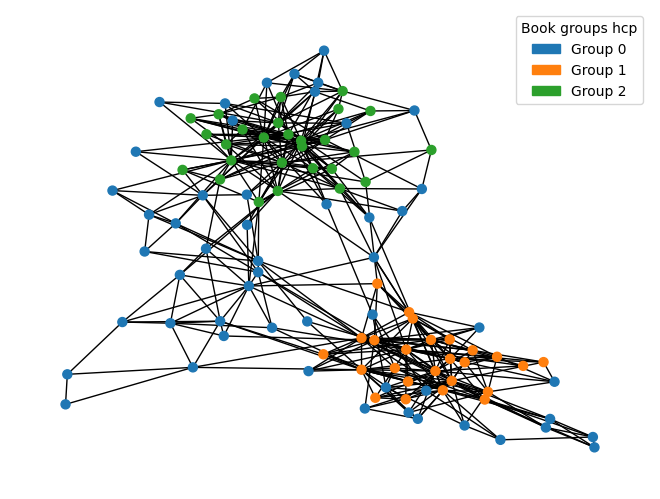

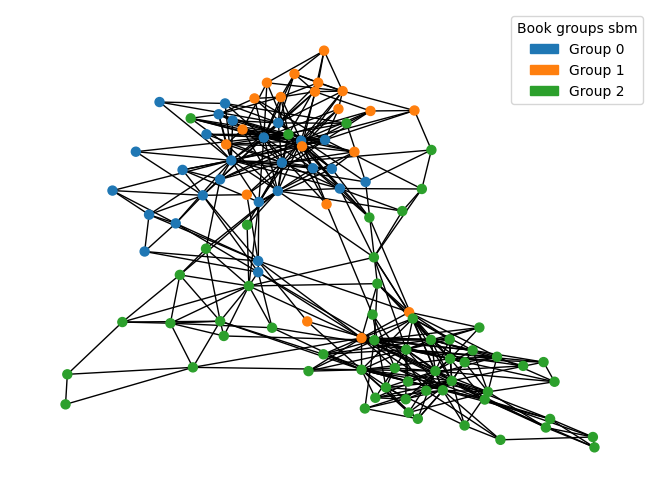

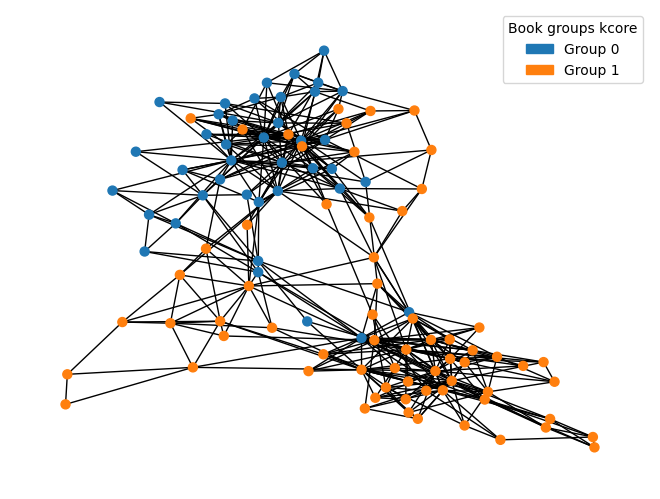

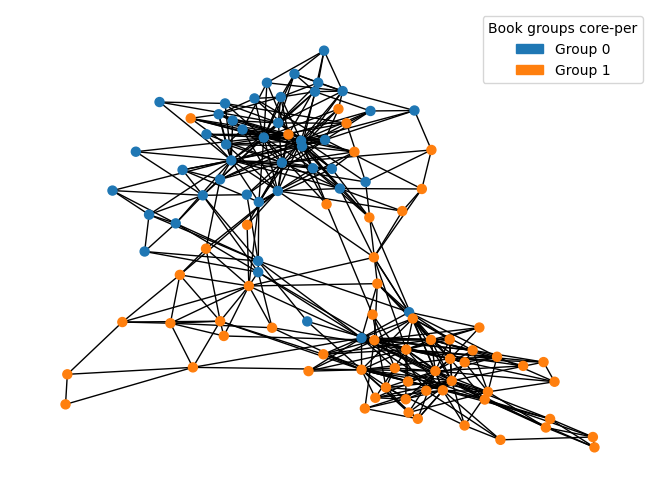

In [ ]:
#%%

np.random.seed(42)
G = get_dataset("polbooks")
results = book_results
memberships_hcp = get_node_memberships(results)
group_memberships_hcp = get_group_membersips(memberships_hcp)
save_data(group_memberships_hcp,"hcp_books.pkl")\

group_memberships_sbm = read_data("./Gallagher_Layered_nodes.pkl")
memberships_sbm = get_node_from_group(group_memberships_sbm)

group_memberships_kcore = read_data("./KCore_nodes.pkl")
memberships_kcore = get_node_from_group(group_memberships_kcore)

group_memberships_cope = read_data("./BnE_nodes.pkl")
memberships_cope = get_node_from_group(group_memberships_cope)

pos = nx.spring_layout(G)
plot_results(memberships_hcp,G,"Book groups hcp",pos)
plt.figure()
plot_results(memberships_sbm,G,"Book groups sbm",pos)
plt.figure()
plot_results(memberships_kcore,G,"Book groups kcore",pos)
plt.figure()
plot_results(memberships_cope,G,"Book groups core-per",pos)

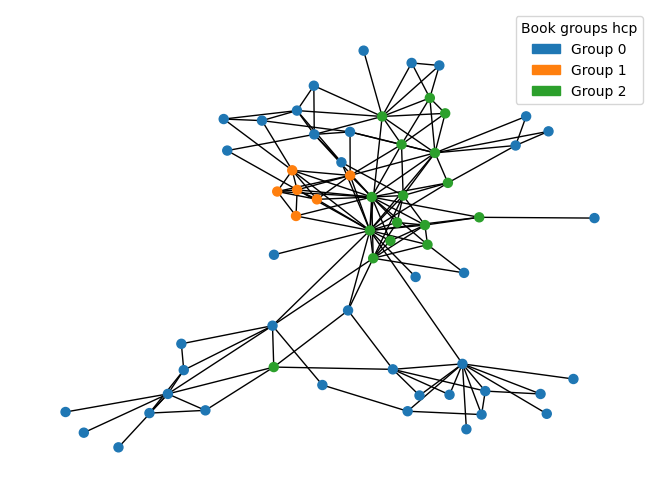

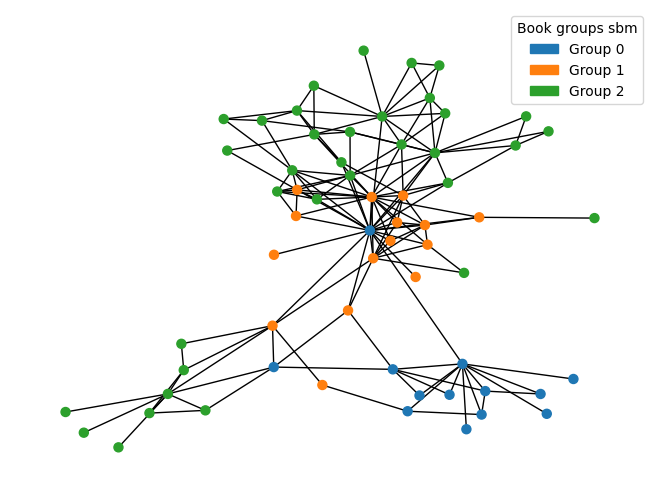

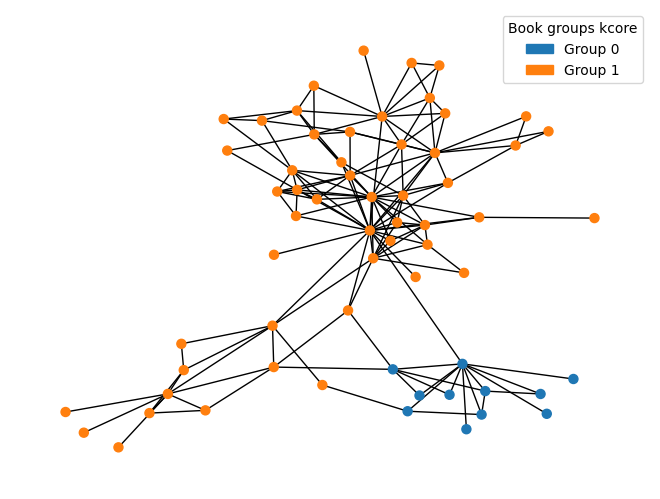

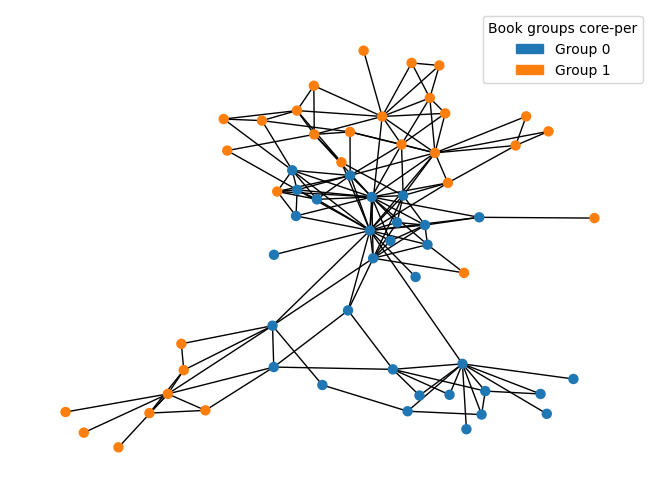

In [ ]:
#%%

G = get_terror()
np.random.seed(42)
results = terror_results
memberships_hcp = get_node_memberships(results)
group_memberships_hcp = get_group_membersips(memberships_hcp)
save_data(group_memberships_hcp,"hcp_terror.pkl")

group_memberships_sbm = read_data("./Gallagher_Layered_terro.pkl")
memberships_sbm = get_node_from_group(group_memberships_sbm)

group_memberships_kcore = read_data("./KCore_terro.pkl")
memberships_kcore = get_node_from_group(group_memberships_kcore)

group_memberships_cope = read_data("./BnE_terro.pkl")
memberships_cope = get_node_from_group(group_memberships_cope)

pos = nx.spring_layout(G)
plot_results(memberships_hcp,G,"Book groups hcp",pos)
plt.figure()
plot_results(memberships_sbm,G,"Book groups sbm",pos)
plt.figure()
plot_results(memberships_kcore,G,"Book groups kcore",pos)
plt.figure()
plot_results(memberships_cope,G,"Book groups core-per",pos)

In [ ]:
# %%

# np.random.seed(42)
# G = get_dataset("football")
# results = football_results
# memberships_hcp = get_node_memberships(results)
# group_memberships_hcp = get_group_membersips(memberships_hcp)
# save_data(group_memberships_hcp,"hcp_football.pkl")
# plot_results(memberships_hcp,G,"Football groups")

In [ ]:
# %%

# G = get_streets()
# np.random.seed(42)
# memberships_hcp = get_node_memberships(street_results)
# group_memberships_hcp = get_group_membersips(memberships_hcp)
# save_data(group_memberships_hcp,"hcp_street.pkl")
# plot_results(memberships_hcp,G,"Street groups")